In [ ]:
print('FUN WITH KERAS')
import pandas as pd
import keras
import numpy as np

training_set = pd.read_csv('exoTrain.csv')
training_set = training_set.iloc[:,1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

# Getting the inputs and the ouputs
X_train = training_set[0:5086]
y_train = training_set[1:5087]


# Reshaping
X_train = np.reshape(X_train, (5086, 1, 1))

FUN WITH KERAS


C:\Users\Hello\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 5000, activation = 'softmax', input_shape = (None, 1)))
regressor.add(Dense(units= 64, activation = 'relu'))
regressor.add(Dense(units=32, activation= 'softmax'))



# regressor.add(Dense(output_dim = 164, activation = 'relu'))
# regressor.add(Dense(units= 212, activation = 'softmax'))
# Adding the output layer
regressor.add(Dense(units = 1))

regressor.summary()

In [10]:
print('Compiling the RNN')
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics= ['accuracy'])
print('Fitting the RNN to the Training set')
print('Training The Data')
regressor.fit(X_train, y_train, batch_size = 156, epochs = 200)


Compiling the RNN
Fitting the RNN to the Training set
Training The Data
Epoch 1/200
5086/5086 [==============================] - ETA: 0s - loss: 0.0053 - acc: 2.0678e-0 - 4s 711us/step - loss: 0.0051 - acc: 1.9662e-04
Epoch 2/200
5086/5086 [==============================] - 1s 104us/step - loss: 3.3164e-04 - acc: 1.9662e-04
Epoch 3/200
5086/5086 [==============================] - 1s 110us/step - loss: 1.7230e-04 - acc: 1.9662e-04 0s - loss: 2.3763e-05 - acc: 0
Epoch 4/200
5086/5086 [==============================] - 0s 95us/step - loss: 1.6666e-04 - acc: 1.9662e-04
Epoch 5/200
5086/5086 [==============================] - 1s 109us/step - loss: 1.6663e-04 - acc: 1.9662e-04
Epoch 6/200
5086/5086 [==============================] - 0s 94us/step - loss: 1.6656e-04 - acc: 1.9662e-04: 0s - loss: 1.9904e-05 - acc: 0.000
Epoch 7/200
5086/5086 [==============================] - 1s 118us/step - loss: 1.6657e-04 - acc: 1.9662e-04
Epoch 8/200
5086/5086 [==============================] - 1s 174us/ste

Epoch 129/200
5086/5086 [==============================] - 1s 144us/step - loss: 1.6675e-04 - acc: 1.9662e-04
Epoch 130/200
5086/5086 [==============================] - 1s 165us/step - loss: 1.6704e-04 - acc: 1.9662e-04 0s - loss: 2.4127e-05 - acc: 2.6709
Epoch 131/200
5086/5086 [==============================] - 1s 172us/step - loss: 1.6734e-04 - acc: 1.9662e-04
Epoch 132/200
5086/5086 [==============================] - 1s 208us/step - loss: 1.6915e-04 - acc: 1.9662e-04 1s - loss: 2.1508e-05 - acc: 0.0000e+0 - ETA: 0s - loss: 1.7991e-05 -
Epoch 133/200
5086/5086 [==============================] - 1s 157us/step - loss: 1.6767e-04 - acc: 1.9662e-04
Epoch 134/200
5086/5086 [==============================] - 1s 156us/step - loss: 1.6866e-04 - acc: 1.9662e-04
Epoch 135/200
5086/5086 [==============================] - 1s 174us/step - loss: 1.6676e-04 - acc: 1.9662e-04 0s - loss: 2.3368e-05 - acc: 2.3742e
Epoch 136/200
5086/5086 [==============================] - 1s 206us/step - loss: 1.6807

In [12]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
test_set = pd.read_csv('exoTest.csv')
real_planet = test_set.iloc[:,1:2].values

# Getting the predicted stock price of 2017
inputs = real_planet
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (570, 1, 1))
predicted_planet = regressor.predict(inputs)
predicted_planet = sc.inverse_transform(predicted_planet)

Getting the real stock price of 2012 - 2016
real stock price training set 2012-2016 [[ 118.81]
 [-239.88]
 [  70.34]
 [ 424.14]
 [-267.21]
 [  35.92]
 [-122.3 ]
 [ -65.2 ]
 [ -66.47]
 [ 560.19]]
predicted stock price 2012-2016 [[1335.5908]
 [1334.3984]
 [1335.4418]
 [1336.6342]
 [1334.324 ]
 [1335.3176]
 [1334.7959]
 [1334.9698]
 [1334.9698]
 [1337.1062]]


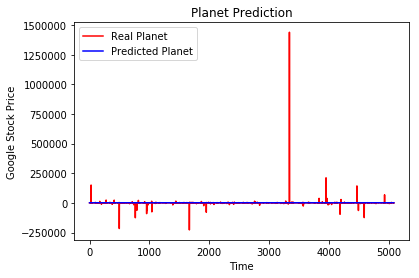

In [19]:
print('Getting the real planet data')
real_planet_train = pd.read_csv('exoTrain.csv')
real_planet_train = real_planet_train.iloc[:,1:2].values
print('real planet 10-20',real_planet_train[10:20])

# Getting the predicted stock price of 2012 - 2016
predicted_planet_train = regressor.predict(X_train)

predicted_planet_train = sc.inverse_transform(predicted_planet_train)
print('predicted planet 10-20',predicted_planet_train[10:20])
import matplotlib.pyplot as plt
# Visualising the results
plt.plot(real_planet_train, color = 'red', label = 'Real Planet')
plt.plot(predicted_planet_train, color = 'blue', label = 'Predicted Planet')
plt.title('Planet Prediction')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()